# Introduction to Systems Biology
## 3. The magic of change and how to find it



In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Simple feedback (exponential function)

Differential equation:

$\frac{dx}{dt} = -k_{neg} x$ for $k_{neg}>0, \, x(t=0)=1$

Solution:
$x(t)=x_0 e ^{-k_{neg}t}$

Steady state:
$x=0$


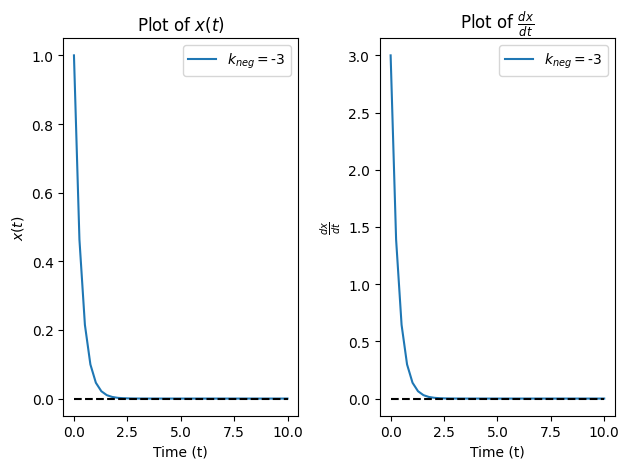

In [2]:
# Parameters
k = -3  # decay constant
x0 = 1   # initial condition
t = np.linspace(0, 10, 40) # time

# Differential equation model accepting parameter k
def d_exp(x, t, k):
    return k * x

# Steady state
xeq = 0

# Solve ODE and get x(t)
x_t = odeint(d_exp, x0, t, args=(k,))

# Calculate dx/dt
dx_dt = -k * x_t


# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for ax, y, yeq, title in zip(axs, [x_t, dx_dt], [xeq, 0],
                             [r"$x(t)$", r"$\frac{dx}{dt}$"]):
    ax.plot(t, y, label=r"$k_{neg}=$"+str(k))
    ax.hlines(yeq, t.min(), t.max(), color='black', linestyle='dashed')
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()
    
plt.tight_layout()
plt.show()

Try diferent parameters of $k_{neg}$.

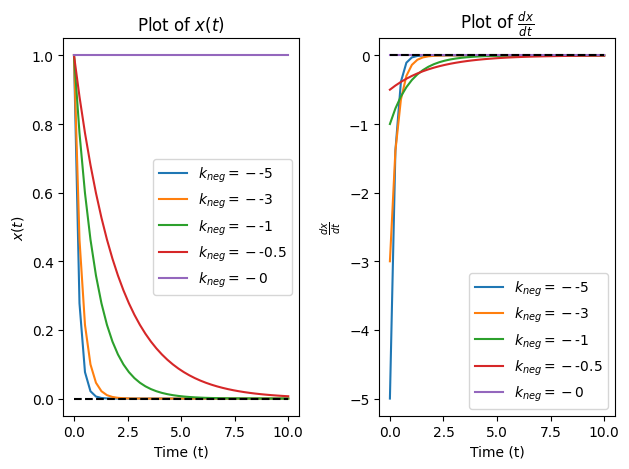

In [3]:
# Parameters
k_list = [-5,-3,-1,-0.5,0]  # constants

# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for k in k_list:
    # Solve ODE and get x(t)
    x_t = odeint(d_exp, x0, t, args=(k,))
    # Calculate dx/dt
    dx_dt = k * x_t
    axs[0].plot(t, x_t, label=r"$k_{neg}=-$"+str(k))
    axs[1].plot(t, dx_dt, label=r"$k_{neg}=-$"+str(k))
    
# Plot title and labels
for ax, yeq, title in zip(axs, [xeq, 0],
                     [r"$x(t)$", r"$\frac{dx}{dt}$"]):
    ax.hlines(yeq, t.min(), t.max(), color='black', linestyle='dashed')
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()
    
plt.tight_layout()
plt.show()

Try diferent parameters of $k_{pos}$

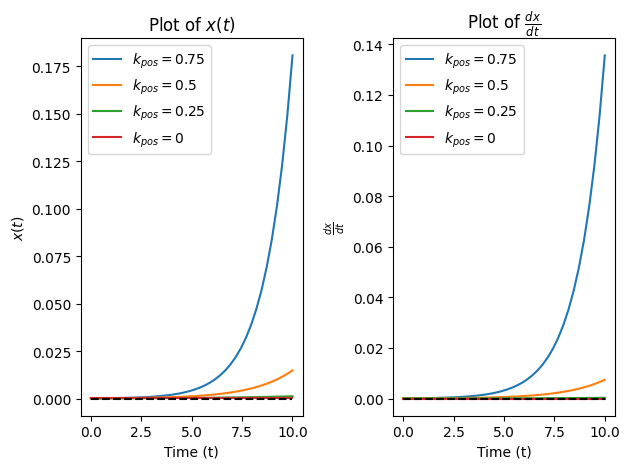

In [4]:
# Parameters
x0 =  0.0001
k_list = [.75,0.5,.25,0]  # constants

# Creating subplots
fig, axs = plt.subplots(1,2)

# Plot x(t) and dx/dt in separate subplots
for k in k_list:
    # Solve ODE and get x(t)
    x_t = odeint(d_exp, x0, t, args=(k,))
    # Calculate dx/dt
    dx_dt = k * x_t
    axs[0].plot(t, x_t, label=r"$k_{pos}=$"+str(k))
    axs[1].plot(t, dx_dt, label=r"$k_{pos}=$"+str(k))

# Plot title and labels
for ax, yeq, title in zip(axs, [xeq, 0],
                           [r"$x(t)$", r"$\frac{dx}{dt}$"]):
    ax.hlines(yeq, t.min(), t.max(), color='black', linestyle='dashed')
    ax.set_xlabel('Time (t)')
    ax.set_ylabel(title)
    ax.set_title(f"Plot of {title}")
    ax.legend()
    
plt.tight_layout()
plt.show()

What is the value of $\frac{dx}{dt}$ when $t\to\infty$ for $k_{pos}$ and $k_{neg}$?

Lets make a direction field

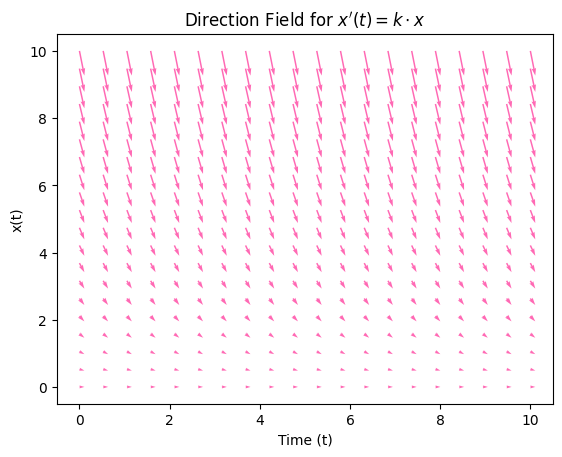

In [5]:
# Parameters
k = -.5  # decay constant
x = np.linspace(0, 10, 20)  # x points (state)
t = np.linspace(0, 10, 20)  # t points (state)

# Create a grid of (t, x) points
T, X = np.meshgrid(t, x)

# Compute the slopes dx/dt = -k * x for the grid points
dX = k * X
dT = np.ones_like(T)  # Time derivative is 1

# Plotting the direction field
plt.quiver(T, X, dT, dX, color='hotpink')  # Quiver plot for direction field
plt.title(r"Direction Field for $x'(t) = k \cdot x$")
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.show()

Phase plane for variable $k$

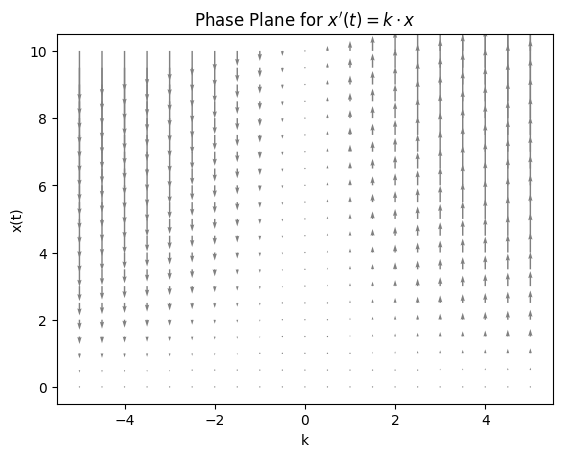

In [6]:
# Parameters
x = np.linspace(0, 10, 21)  # x points (state)
k = np.linspace(-5, 5, 21)  # k points (decay constants)

# Create a grid of (k, x) points
K, X = np.meshgrid(k, x)

# Compute dx/dt = -k * x for the grid points
dX = K * X
dK = np.zeros_like(K)  # Constant derivative is 0

# Plotting the phase plane
plt.quiver(K, X, dK, dX, color='gray')  # Quiver plot for the phase plane
plt.title(r"Phase Plane for $x'(t) = k \cdot x$")
plt.xlabel('k')
plt.ylabel('x(t)')
plt.show()

## Saturated feedback (Michaelis-Menten)

Differential equation:
$\frac{dx}{dt} = -k_{neg}x + \dfrac{c\cdot x}{x+1/k_{pos}}$ 

Steady state:
$x=0$ and $x=\frac{c\cdot k_{pos}-k_{neg}}{k_{pos}k_{neg}}$

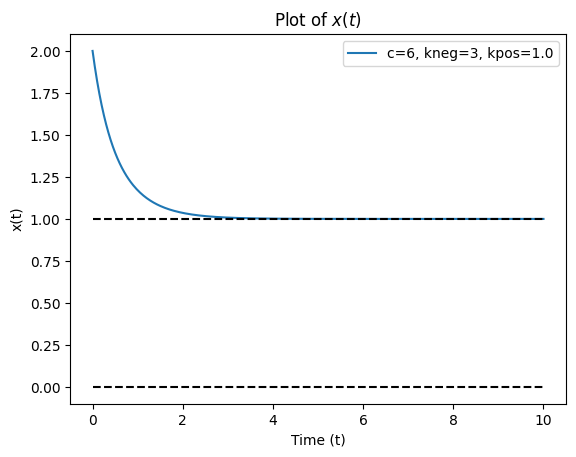

In [7]:
# Parameters
kneg = 3  # negative feedback
kpos = 1/1  # positive feedback
c = 6 #Vmax
x0 = 2   # initial condition
t = np.linspace(0, 10, 400) # time

# Differential equation model accepting parameter k
def d_feedback(x, t, k):
    return -kneg*x + c*x/(x+1/kpos)

# Steady states
xeq = [0, (c*kpos-kneg)/(kpos*kneg)]

# Solve ODE and get x(t)
x_t = odeint(d_feedback, x0, t, args=(k,))

# Plot
plt.plot(t, x_t, label=f"c={c}, kneg={kneg}, kpos={round(kpos,3)}")
plt.hlines(xeq[0], t.min(), t.max(), color='black', linestyle='dashed')
plt.hlines(xeq[1], t.min(), t.max(), color='black', linestyle='dashed')
plt.title("Plot of $x(t)$")
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.legend()
plt.show()

## Sniffer motif

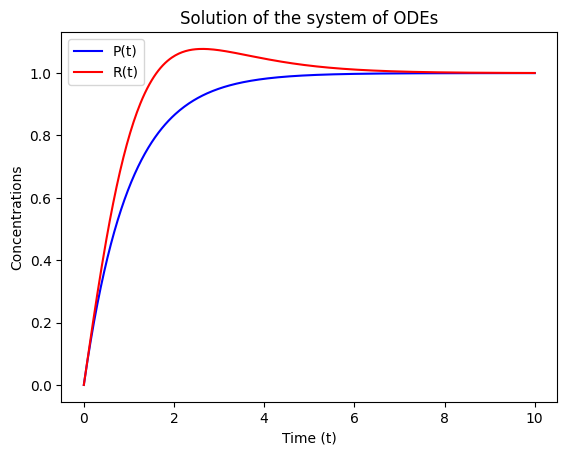

In [8]:
# Parameters
S = 1
k1p = 1
k1d = 1
k2p = 1
k2d = 0
k2dp = 1

# Initial conditions for P and R
P0 = 0
R0 = 0
initial = [P0, R0]

# Time points
t = np.linspace(0, 10, 400)

# Model equations
def sniffer(y, t, S, k1p, k1d, k2p, k2d, k2dp):
    P, R = y
    dP_dt = k1p * S - k1d * P
    dR_dt = k2p * S - k2d * P - k2dp * R * P
    return [dP_dt, dR_dt]

# Solve ODEs
sol = odeint(sniffer, initial, t, args=(S, k1p, k1d, k2p, k2d, k2dp))

# Extract solutions for P(t) and R(t)
P_t = sol[:, 0]
R_t = sol[:, 1]

# Plotting the results
plt.plot(t, P_t, label='P(t)', color='b')
plt.plot(t, R_t, label='R(t)', color='r')

plt.title('Solution of the system of ODEs')
plt.xlabel('Time (t)')
plt.ylabel('Concentrations')
plt.legend()
plt.show()


In [9]:
sol

array([[0.        , 0.        ],
       [0.02475119, 0.02505747],
       [0.04888976, 0.05008415],
       [0.07243088, 0.07505037],
       [0.09538932, 0.09992772],
       [0.11777952, 0.12468905],
       [0.13961553, 0.14930849],
       [0.16091108, 0.17376149],
       [0.18167954, 0.19802476],
       [0.20193395, 0.22207633],
       [0.22168704, 0.24589553],
       [0.24095122, 0.26946296],
       [0.25973859, 0.29276049],
       [0.27806094, 0.31577125],
       [0.2959298 , 0.3384796 ],
       [0.31335638, 0.36087107],
       [0.33035164, 0.38293243],
       [0.34692624, 0.40465155],
       [0.36309059, 0.42601744],
       [0.37885487, 0.44702018],
       [0.39422895, 0.46765094],
       [0.40922251, 0.48790186],
       [0.42384496, 0.50776607],
       [0.43810549, 0.52723766],
       [0.45201305, 0.54631161],
       [0.46557638, 0.56498378],
       [0.47880401, 0.58325083],
       [0.49170423, 0.60111022],
       [0.50428516, 0.61856019],
       [0.5165547 , 0.63559965],
       [0.